# Práctica 7: Vecinos más cercanos.

## Realizado por:
- Susana Suárez Mendoza
- Mara Pareja del Pino

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection, neighbors, preprocessing, metrics
import time
import matplotlib.pyplot as plt

### Ejercicio 1. Clasificación por vecinos más cercanos.


1. Dividir el conjunto de entrenamiento en entrenamiento (70%) y test (30%).

In [2]:
data_csv= pd.read_csv('./datos/precio_casas_clasificacion.csv', sep = ',')
df = data_csv.to_numpy()
data_x = df[:, :-1]
data_y = df[:, -1]

X_train, X_test, y_train, y_test = model_selection.train_test_split(data_x, data_y, test_size=0.3, random_state=123)

2. Obtener la tasa de acierto con diferentes números de vecinos (n_neighbors) entre 1 y 20.

In [3]:
for i in range(1, 21):
    clf = neighbors.KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)

    accuracy = clf.score(X_test, y_test) * 100
    print("Tasa de acierto con n_neighbors = ", i, " es: ", round(accuracy,2), "%")

Tasa de acierto con n_neighbors =  1  es:  35.95 %
Tasa de acierto con n_neighbors =  2  es:  36.24 %
Tasa de acierto con n_neighbors =  3  es:  35.84 %
Tasa de acierto con n_neighbors =  4  es:  36.89 %
Tasa de acierto con n_neighbors =  5  es:  38.13 %
Tasa de acierto con n_neighbors =  6  es:  38.03 %
Tasa de acierto con n_neighbors =  7  es:  38.21 %
Tasa de acierto con n_neighbors =  8  es:  38.47 %
Tasa de acierto con n_neighbors =  9  es:  38.58 %
Tasa de acierto con n_neighbors =  10  es:  38.65 %
Tasa de acierto con n_neighbors =  11  es:  38.7 %
Tasa de acierto con n_neighbors =  12  es:  38.78 %
Tasa de acierto con n_neighbors =  13  es:  39.05 %
Tasa de acierto con n_neighbors =  14  es:  38.94 %
Tasa de acierto con n_neighbors =  15  es:  38.73 %
Tasa de acierto con n_neighbors =  16  es:  38.42 %
Tasa de acierto con n_neighbors =  17  es:  38.47 %
Tasa de acierto con n_neighbors =  18  es:  39.18 %
Tasa de acierto con n_neighbors =  19  es:  38.87 %
Tasa de acierto con n_

3. Repetir lo anterior pero antes escalando el valor de las características entre 0 y 1, para lo que se hará uso de la clase MinMaxScaler de la librería sklearn. Explicar si existe diferencia con los resultados del paso 2.

In [4]:
scaler = preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
for i in range(1, 21):
    clf = neighbors.KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train_scaled, y_train)

    accuracy = clf.score(X_test_scaled, y_test) * 100
    print("Tasa de acierto con n_neighbors = ", i, " es: ", round(accuracy,2), "%")

Tasa de acierto con n_neighbors =  1  es:  58.87 %
Tasa de acierto con n_neighbors =  2  es:  57.14 %
Tasa de acierto con n_neighbors =  3  es:  60.42 %
Tasa de acierto con n_neighbors =  4  es:  61.71 %
Tasa de acierto con n_neighbors =  5  es:  62.13 %
Tasa de acierto con n_neighbors =  6  es:  62.65 %
Tasa de acierto con n_neighbors =  7  es:  63.23 %
Tasa de acierto con n_neighbors =  8  es:  63.21 %
Tasa de acierto con n_neighbors =  9  es:  63.37 %
Tasa de acierto con n_neighbors =  10  es:  63.29 %
Tasa de acierto con n_neighbors =  11  es:  63.28 %
Tasa de acierto con n_neighbors =  12  es:  63.19 %
Tasa de acierto con n_neighbors =  13  es:  63.47 %
Tasa de acierto con n_neighbors =  14  es:  63.63 %
Tasa de acierto con n_neighbors =  15  es:  63.61 %
Tasa de acierto con n_neighbors =  16  es:  63.63 %
Tasa de acierto con n_neighbors =  17  es:  63.82 %
Tasa de acierto con n_neighbors =  18  es:  63.87 %
Tasa de acierto con n_neighbors =  19  es:  63.6 %
Tasa de acierto con n_

Claramente existe una diferencia significativa del 30% aproximadamente. Por lo que se demuestra que la tasa de acierto umenta si se realiza el escalado. Por tanto, es necesario escalar.

4. Calcular el tiempo de ejecución del paso 3 para los tres algoritmos de búsqueda que implementa la clase, explicando los resultados obtenidos.

In [6]:
algoritmos = ['brute', 'ball_tree', 'kd_tree']
times = []
for algoritmo in algoritmos:
    incio = time.time()
    for j in range(10):
        for i in range(1, 21):
            clf = neighbors.KNeighborsClassifier(n_neighbors=i, algorithm=algoritmo)
            clf.fit(X_train_scaled, y_train)
            clf.predict(X_test_scaled)
        
    fin = time.time()
    times.append(fin - incio)

for algoritmo in algoritmos:
    print("Tiempo de ejecución para el algoritmo ", algoritmo, " es: {:.3f} seg.".format(times[algoritmos.index(algoritmo)]))


Tiempo de ejecución para el algoritmo  brute  es: 66.736 seg.
Tiempo de ejecución para el algoritmo  ball_tree  es: 126.094 seg.
Tiempo de ejecución para el algoritmo  kd_tree  es: 48.966 seg.


Sorprendentemente, el método en bruto que aparentemente debería durar mucho más debido a que calcula todas las distancias de todas las muestras, es el más rápido. Mientras que el método ball_tree el cual está planteado para mejorar la eficiencia computacional de manera recursiva es el que más tiempo lleva:

5. Obtener la mejor combinación del argumento weights y n_neighbors dividiendo el conjunto de entrenamiento nuevamente en entrenamiento (80%) y validación (20%), y obtener la tasa de acierto en el conjunto de test. Comparar el resultado con los obtenidos en el paso 3.

In [7]:
X_train_sub, X_test_sub, y_train_sub, y_test_sub = model_selection.train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=123)

In [8]:
weights = ['uniform', 'distance']
results = []
for weight in weights:
    for i in range(1, 21):
        clf = neighbors.KNeighborsClassifier(n_neighbors=i, weights=weight)
        clf.fit(X_train_sub, y_train_sub)

        accuracy = clf.score(X_test_sub, y_test_sub) * 100
        results.append([weight, i, accuracy])

best_result = max(results, key=lambda x: x[2])
print("Mejor resultado: ", best_result)


Mejor resultado:  ['distance', 13, 64.0484429065744]


<AxesSubplot: xlabel='k'>

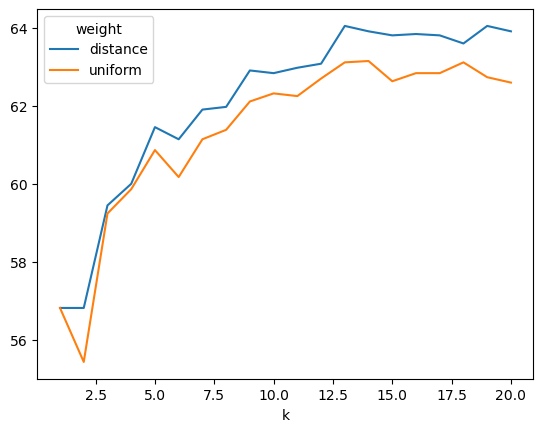

In [9]:

df = pd.DataFrame(results, columns=['weight', 'k', 'accuracy'])
df.pivot(index='k', columns='weight', values='accuracy').plot()

La mejor combinación del proceso ha sido con k = 13 y el método de distance.

In [10]:
clf = neighbors.KNeighborsClassifier(n_neighbors=13, weights='distance')
clf.fit(X_train_scaled, y_train)
accuracy = clf.score(X_test_scaled, y_test) * 100
print("Tasa de acierto con n_neighbors = 13 es: ", round(accuracy,2), "%")

Tasa de acierto con n_neighbors = 13 es:  64.11 %


Podemos concluir que esta tasa de acierto es mayor que las vistas en los pasos 2 y 3 por tanto, es conveniente que este algoritmo se entrene con subconjuntos de entrenamiento para proporcionar la mejor combinación posible.

### Ejercicio 2. : Implementación del clasificador por centroide más próximo.

In [11]:
class CentroideMasProximo:

    def __init__(self):
        self.centroides = None
        self.clases = None

    def ajustar(self, X, y):
        self.centroides = []
        self.clases = np.unique(y)
        
        for clase in self.clases:
            X_clase = X[y == clase]
            centroide = np.mean(X_clase, axis=0)
            self.centroides.append(centroide)

    def predecir(self, X):
        y_pred = []
        for x in X:
            distancias = []
            for centroide in self.centroides:
                distancia = np.linalg.norm(x - centroide)
                distancias.append(distancia)
            clase = self.clases[np.argmin(distancias)]
            y_pred.append(clase)
        return y_pred
       

### Ejemplo de utilización nuestra clase y scikitlearn.

1. Datos originales.

In [12]:
#Nuesrtro modelo.
modelo = CentroideMasProximo()
modelo.ajustar(X_train, y_train)
y_pred = modelo.predecir(X_test)
accuracy = np.mean(y_pred == y_test) * 100

#Modelo de sklearn
clf = neighbors.NearestCentroid()
clf.fit(X_train, y_train)
accuracy_sklearn = clf.score(X_test, y_test) * 100

print("Tasa de acierto con nuestro modelo es: ", round(accuracy,2), "%")
print("Tasa de acierto con el modelo de sklearn es: ", round(accuracy_sklearn,2), "%")

Tasa de acierto con nuestro modelo es:  21.88 %
Tasa de acierto con el modelo de sklearn es:  21.88 %


2. Datos escalados.

In [13]:
# Nuestro modelo
modelo_esc = CentroideMasProximo()
modelo_esc.ajustar(X_train_scaled, y_train)
y_pred_esc = modelo_esc.predecir(X_test_scaled)
accuracy_esc = np.mean(y_pred_esc == y_test) * 100

# Modelo de sklearn
clf_esc = neighbors.NearestCentroid()
clf_esc.fit(X_train_scaled, y_train)
y_pred_sklearn_esc = clf_esc.predict(X_test_scaled)
accuracy_sklearn_esc = clf_esc.score(X_test_scaled, y_test) * 100

print("Tasa de acierto con nuestro modelo es: ", round(accuracy_esc,2), "%")
print("Tasa de acierto con el modelo de sklearn es: ", round(accuracy_sklearn_esc,2), "%")

Tasa de acierto con nuestro modelo es:  43.75 %
Tasa de acierto con el modelo de sklearn es:  43.75 %


El método de la librería y el nuestro propio tienen tasas de acierto parecidas. Sin embargo, este método por centroide tiene una menor tasa de acierto que el método KNN.

3. Matriz de confusión.

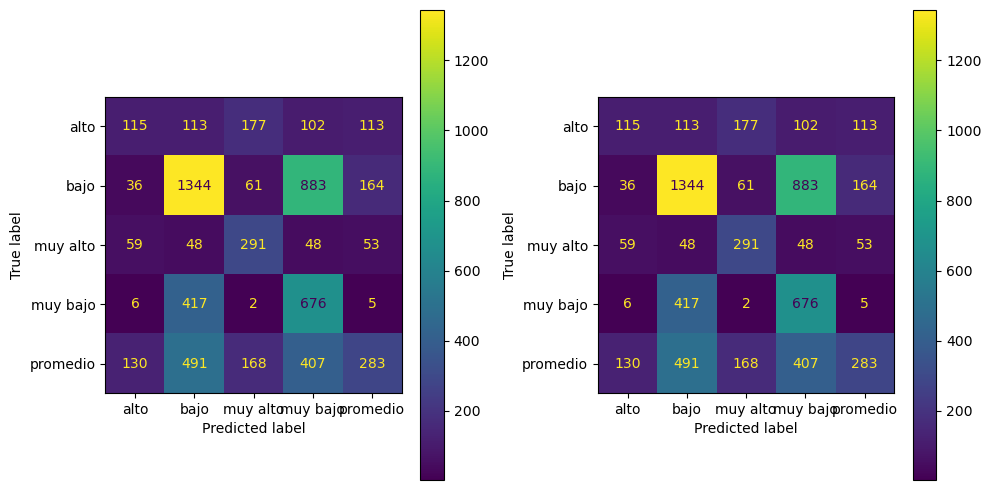

In [14]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_esc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=modelo_esc.clases).plot(ax=ax1)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_sklearn_esc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=clf_esc.classes_).plot(ax=ax2)
plt.tight_layout()
plt.show()

La matriz de la izquierda es la de nuestra clase implementada y la de la derecha la clase de la librería scikit-learn. Podemos concluir que ambas clases no son muy buenas ya que los valores por columnas en su mayoría no son los clasificados correctamente.